# Data Analytics Tool 

## Introduction

This program is intended to complete a full data analyis.
It is able to pre-process the data set and give descriptive analysis results, all based on the users preferences.

The focus lies on being interactive and automated. In other words, the program contains specifically designed function for which it asks the user desires to perform these on her data set.

Any kind of csv file should be applicable. The user needs make sure the csv file is located in the correct directory.

## 1. Import of libraries and the data set 

In [3]:
# 1.2 Imports
import sys
import math
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sn

In [37]:
print("Hello User!\nLet us begin analysing your data!")

Hello User!
Let us begin analysing your data!


In [ ]:
# 1.3 preparing answers for y/n questions and colums list needed for 
yes = {"yes", "y"}
no = {"no", "n"}

In [72]:
# 1.4 read data 
def start():
    inp = input("\nIs your csv file located in the correct working directory?(y/n): ")
    if inp in yes:
        data = pd.read_csv("listings.csv")
        print("In the following tables you get an overview of your data including the head and tail:")
        return
    elif start in no:
        print("\nPlease put your csv file in the correct working directory!")
        start()
    else: 
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        start()

In [73]:
start()
data.head()
data.tail()


Is your csv file located in the correct working directory?(y/n): y
In the following tables you get an overview of your data including the head and tail:


,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7902,38105126,Loft 2 pax near Haw Par / Pasir Panjang. Free ...,278109833,Central Region,Queenstown,1.27973,103.78751,100,3,0,NaT,NaN,31,61
7903,38108273,3bedroom luxury at Orchard,238891646,Central Region,Tanglin,1.29269,103.82623,550,6,0,NaT,NaN,34,365
7904,38109336,[ Farrer Park ] New City Fringe CBD Mins to MRT,281448565,Central Region,Kallang,1.31286,103.85996,58,30,0,NaT,NaN,3,173
7905,38110493,Cheap Master Room in Central of Singapore,243835202,Central Region,River Valley,1.29543,103.83801,56,14,0,NaT,NaN,2,30
7906,38112762,Amazing room with private bathroom walk to Orc...,28788520,Central Region,River Valley,1.29672,103.83325,65,90,0,NaT,NaN,7,365


In [90]:
# 1.5 more preparation
columns = list(data.columns) 
c = []
d = []

In [63]:
## 1.6 showing max rows and columns of data set
print("\nYour data set includes the following number of rows and columns: ")
data.shape


Your data set includes the following number of rows and columns: 


(7907, 14)

## 2. Cleaning Data Set

The program continues with the data pre-processing, an important part for data analytics.  
It is able to various common commands of data analytics and will ask the user for the necessary inputs. 

In [92]:
# defining an input function such that we can run this everytime the program needs to ask the user for columns 
# the user may like to edit

def getInput():
    global c
    c.clear()
    input_string = input("\nEnter all columns separated with space: ")
    c  = input_string.split(" ")
    for char in c: 
        if char not in columns:
            print(char, "is not given in data set. Please retry!")
            getInput()
    return 

In [9]:
## 2.2 removing columns
# define function that asks for columns and deletes them 

def qRemove():
    inp = str(input("\nWould you like to remove columns from your data set? (y/n): ").lower())
    if inp in yes:
        getInput()
        global data
        data = data.drop(c, axis = 1) # axis = 1 --> column
        for char in c:
            print("\n" + char, "has been removed from the data set!")
        return 
    elif inp in no:
        return
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        qRemove()
    return

In [10]:
# Use function
qRemove()


Would you like to remove columns from your data set? (y/n): y

Enter all columns separated with space: host_name room_type

host_name has been removed from the data set!

room_type has been removed from the data set!


In [60]:
## 2.3 get further details of the data types 

print("""In the next table you will find more specific information about your data set:
("datetime64" stands for date data, int64" and "float64" stands for numeric data,\nwhereas "object" denotes categorical data)\n""")

data.dtypes

In the next table you will find more specific information about your data set:
("datetime64" stands for date data, int64" and "float64" stands for numeric data,
whereas "object" denotes categorical data)



id                                         int64
name                                      object
host_id                                    int64
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [53]:
## 2.4 Transforming data types
# here we want to ask the user if there are columns present that the user wants to change the type in
# for this we create define functions for each column type and insert these into our main function 

#define category change function
def inpCat():
    inp =str(input("\nAre there columns that need to be changed into character type? (y/n): ").lower())
    if inp in yes:
        getInput()
        for char in c:
            global data
            data[char] = data[char].astype(str)
            print(char, "has been changed to character!")
        return
    elif inp in no:
        return
    else: 
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        inpCat()
        
# define float change function
def inpNum():
    inp = str(input("\nAre there columns that need to be changed into numeric? (y/n): ").lower())
    if inp in yes:
        getInput()
        for char in c:
            global data
            data[char] = pd.to_numeric(data[char])
            print(char, "has been changed to numeric!")
        return
    elif inp in no:
        return
    else: 
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        inpNum()      


#define date change function
def inpDate():
    inp = str(input("\nAre there columns that need to be changed into date? (y/n): ").lower())
    if inp in yes:
        getInput()
        for char in c:
            try:
                dateFormat =str(input("\nFor " + str(char) + ", please enter the correct format of the date (eg. %Y-%m-%d): "))
                global data
                data[char] = pd.to_datetime(data[char], format=dateFormat)
                print(char, "has been changed to date!")
            except ValueError:
                print("Time data does not match format", dateFormat +". Insert correct format!\nTry again!")
                inpDate()
        return
    elif inp in no:
        return
    else: 
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        inpDate()
    
# define main Transform function
def qTransform():
    inp = str(input("\nAre there any columns in the wrong format that need to be changed? (y/n): ?").lower())
    if inp in yes:
        inpCat()
        inpNum()
        inpDate()
        return
    elif inp in no:
        return
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        qTransform()
    return


In [59]:
# 2.4 cont. execute
qTransform()
print("\nSee the table with your prefered types:")
data.dtypes


Are there any columns in the wrong format that need to be changed? (y/n): ?n

See the table with your prefered types:


id                                         int64
name                                      object
host_id                                    int64
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [ ]:
## 2.5 deleted

In [18]:
## 2.6 count number of null values

print("Here you see the number of null values for each variable.")

data.isnull().sum()

In the next table the number of null values for each variable are revealed.


id                                   0
name                                 2
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [24]:
## 2.7 remove NA values

# define function to ask if user wants to remove null values
def qDrop():
    inp = str(input("\nDo you want to remove the null values? (y/n): ").lower())
    if inp in yes:
        global data
        data = data.dropna(how="any", axis=0) # axis = 0 --> row
        print("\nNull values have been removed!")
    elif inp in no:
        return      
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        qDrop()

In [23]:
# 2.7 cont. execute function        
qDrop()


Do you want to remove the null values? (y/n): n


In [ ]:
## 2.8 Renaming columns 
# define function to ask if user wants to rename columns

def qRename():
    inp = str(input("\nDo you want to rename columns? (y/n): ").lower())
    if inp in yes:
        getInput()
        for char in c:
            global data
            newname_input = str(input("\nHow do you want to rename the column " + str(char) + "?: "))
            data = data.rename(columns = {char: newname_input})
            print(str(char) +" has been renamed to " + str(newname_input)+"!")
    elif inp in no:
        return      
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        qRename()


In [25]:
## 2.9 check for duplicates 

# To get rid of duplicates we check if the *key* appears more than once
# A key in a data set is a variable which is unique. In other words, the key is the value whith which
# you can access each single observation. 
# Thus the program asks the user for the key. The user must know this key! 
# The program hasn't got the intelligence to figure it out by itself. 

# defining question for key
def Key():
    key = input("\nWhat column is the primary key of your data set?: ")
    if key not in columns:
        print("\nThere is no such column. Please try again!")
        qKey()
    else:
        return key


# defining removal of duplicates 
def removeDupl():
    inp = str(input("\nDo you want to remove the duplicates from your data set? (y/n): ").lower())
    if inp in yes:
        global data
        data = data.drop_duplicates(key)
        print("\nThe duplicates have been removed!")
    elif inp in no:
        return 
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        removeDupl()
    return

#defining overall question for handling duplicates
def qDuplicates():
    inp = str(input("\nDo you want to check for duplicates in your data set? (y/n): ").lower())
    if inp in yes:
        global key
        key = Key()
        duplications = sum(data.duplicated(key))
        print("There are", duplications, "duplicates in your data set.")
        if duplications == 0:
            return
        else:
            removeDupl()
    elif inp in no: 
        return
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        qDuplicates()  
    return

In [17]:
# 2.9 cont. execute functions
qDuplicates()


Do you want to check for duplicates in your data set?  (y/n): yes

What column is the primary key of your data set?: id
There are 0 duplicates in your data set.


## 3. Univariate Analysis

After the data processing we now start with descriptive analysis of the data set.  
The program starts with categorical data and then switches to numerical data.  
The program gives the chance to examine each value individually.

In [75]:
##  3.0.1 split numerical and categorical data into two lists
print("\nWe now continue with our analyis of the data.")

# define function to separate numerical and categorical data into two lists

def get_variable_type():   
     # numerical variables
    num_variables = data.select_dtypes(include=["int64","float64"]).columns

    # categorical variables
    cat_variables = data.select_dtypes(include=["object"]).columns
    return list(num_variables), list(cat_variables)

num_variables, cat_variables = get_variable_type()


We now continue with our analyis of the data.


In [79]:
# 3.0.1 cont. give update

print("\nYour data has been split into two categories:\nNumerical and Categorical\nYour data set contains", str(len(num_variables)), "numerical and", str(len(cat_variables)), "categorical variables.")


Your data has been split into two categories:
Numerical and Categorical
Your data set contains 10 numerical and 3 categorical variables.


## 3.1 Categorical Data analysis


In [82]:
# 3.1.1 grid plotting categorical data
# it takes all categorical variables and plots them into a histogram
# it is kinda messy for some variables but I guess this is just how it is. 

print("\nBelow you can explore a grid of count plots including all the categorical data of your data set:\n")

cat_melt = pd.melt(data, value_vars=sorted(cat_variables))
cat_grid = sn.FacetGrid(cat_melt, col="variable", col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation="vertical")
cat_grid = cat_grid.map(sn.countplot, "value", color = "lightcoral",)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in cat_grid.axes.flat]
plt.show()


Below you can explore a grid of count plots including all the categorical data of your data set:



/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32034 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32654 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36187 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 33457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/sit

/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38081 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backe

/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20811 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30721 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backe

/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25163 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36605 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65438 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65422 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backe

/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35780 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 19996 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20248 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backe

/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31934 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 40065 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backe

/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24237 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31119 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24605 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backe

/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39030 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backe

/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 11088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 33678 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21414 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backe

/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26202 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20813 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backe

/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35834 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 28385 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38518 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Dada/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backe

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1a21089710> (for post_execute):


KeyboardInterrupt: 

### Specific categorical analysis

Here the program starts with looking at a categorical values individually. The user chooses which and how many columns he wants to inspect.

In [106]:
# define function for single input

def getSingleInput():
    global d
    d = input("\nEnter a single column: ")
    if d not in columns:
        print(char, "is not given in data set. Please retry!")
        d.clear()
        getInput()
    return 
    

In [107]:
## 3.1.2 value_counts   (doesn't work in jupyter notebook but maybe in IDE) 
#counts the number of each single group of category and presents result in a small df

def qCat():
    inp = str(input("\nDo you want to look at any specific categorical columns individually? (y/n): "))
    if inp in yes:
        getSingleInput()
        global d
        a = data[d].value_counts()
        return a
    elif inp in no:
        return
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        qCat()
    
def countCat():
        data[d].value_counts()

In [109]:
## 3.1.2 cont. execute function
qCat()
qCat()
qCat()



Do you want to look at any specific categorical columns individually? (y/n): n

Do you want to look at any specific categorical columns individually? (y/n): n

Do you want to look at any specific categorical columns individually? (y/n): n


In [ ]:
# 3.1.3 #deleted

In [ ]:
# 3.1.4 update
print("\nWe now move on to the numerical values.")

## 3.2 Numerical Data analysis


Below you can explore a grid of distribution plots including all the numerical data of your data set:



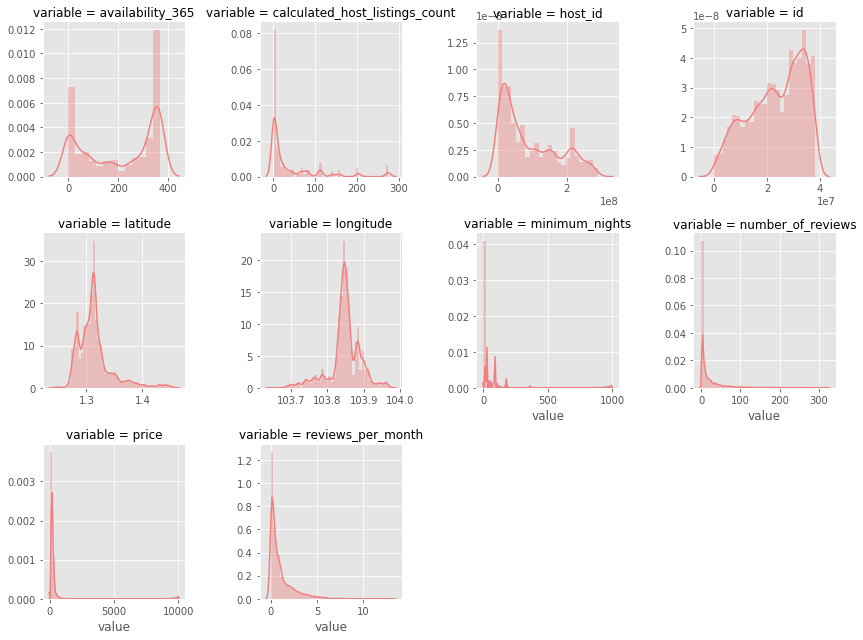

In [110]:
## 3.2.1 distribution grid plot of all numerical variables
# takes all numerical variables and plots them into an distribution plot
print("\nBelow you can explore a grid of distribution plots including all the numerical data of your data set:\n")

num_melt = pd.melt(data, value_vars=sorted(num_variables))
num_grid = sn.FacetGrid(num_melt, col="variable", col_wrap=4, sharex=False, sharey=False)
num_grid = num_grid.map(sn.distplot, "value", color = "lightcoral")

###  Specific Numeric analysis



Like before for categorical data the program here asks which *numerical* columns the user wants to inspect more specifically.



In [168]:
def qNumValue():
    inp = str(input("\nDo you want to examine any numerical columns individually? (y/n): ").lower())
    if inp in yes:
        getInput()
    elif inp in no:
        return
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        qNumValue()

In [136]:
qNumValue()

['price', 'latitude']

In [133]:
## 3.2.2 summary
# this part should come automatically, no user input required
# instead of price we need the specific variable the user wants to inspect
def Summary():
    for char in c:
        mean = data[char].mean()
        median = data[char].median()
        std = data[char].std()
        mini = data[char].min()
        q_25 = data[char].quantile(q=0.25)
        q_50 = data[char].quantile(q=0.5)
        q_75 = data[char].quantile(q=0.75)
        maxi = data[char].max()
        print("\nVariable " +str(char)+ " possesses the following properties:\n\nmean: \t\t", round(mean, 2),
              "\nmedian: \t", round(median, 2),
             "\nstd: \t\t", round(std, 2),
             "\nmin: \t\t", round(mini, 2),
             "\n25%: \t\t", round(q_25, 2),
             "\n50%: \t\t", round(q_50, 2),
             "\n75%: \t\t", round(q_75, 2),
             "\nmax: \t\t", round(maxi, 2)) 
    return  

    
    
    
    

In [143]:
SkewKurtosis()


Results for price:
Skew:  19.09 | Kurtosis:  464.43

A skew value of 19.09 indicates an extremely right skewed distribution.
The kurtosis with a value of 464.43 is extremely leptokurtic.
This indicates a very high and sharp peak.
In addition, this means that the distribution is long and fat tails are observable.
Outliers are highly possible.

Results for latitude:
Skew:  1.72 | Kurtosis:  4.14

A skew value of 1.72 indicates a highly right skewed distribution.
The kurtosis with a value of 4.14 is leptokurtic.
This indicates a high and sharp peak.
In addition, this means that the distribution is long and fat tails are observable.
Outliers are highly possible.


In [142]:
## 3.2.3 skew & Kurtosis
def SkewKurtosis():
    for char in c:
        skew = data[char].skew()
        kurtosis = data[char].kurtosis()
        print("\nResults for " + str(char) + ":")
        print("Skew: ", round(skew, 2) , "| Kurtosis: ", round(kurtosis, 2))
        if skew >= -0.5 and skew <= 0.5:
            print("\nA skew value of", round(skew,2), "indicates a fairly symmetric distribution.")
        elif skew > 0.5 and skew <=1:
            print("\nA skew value of", round(skew,2), "indicates a moderately right skewed distribution.")
        elif skew >1:
            if skew > 10:
                print("\nA skew value of", round(skew,2), "indicates an extremely right skewed distribution.")
            else:
                print("\nA skew value of", round(skew,2), "indicates a highly right skewed distribution.")
        elif skew >= -1 and skew <-0.5:
            print("\nA skew value of", round(skew,2), "indicates a moderately left skewed distribution.")
        elif skew <-1:  
            if skew <-10:
                print("\nA skew value of", round(skew,2), "indicates an extremely left skewed distribution.")
            else:
                print("\nA skew value of", round(skew,2), "indicates a highly left skewed distribution.")
        if kurtosis <2.9:
            if kurtosis<0:
                print("The kurtosis with a value of", round(kurtosis,2), "may indicate a bimodal distribution with two different modes.")
            if kurtosis >= 0:
                print("The kurtosis with a value of", round(kurtosis,2), "is platykurtic.\nThis indicates a low and broad peak.\nIn addition, this means that the distribution is shorter and tails are thinner.\nOutliers are less likely")
        elif kurtosis >3.1: 
            if kurtosis > 30:
                print("The kurtosis with a value of", round(kurtosis,2), "is extremely leptokurtic.\nThis indicates a very high and sharp peak.\nIn addition, this means that the distribution is long and fat tails are observable.\nOutliers are highly possible.")
            else:
                print("The kurtosis with a value of", round(kurtosis,2), "is leptokurtic.\nThis indicates a high and sharp peak.\nIn addition, this means that the distribution is long and fat tails are observable.\nOutliers are highly possible.")
        elif kurtosis >=2.9 and kurtosis <= 3.1:
            print("The kurtosis with a value of", round(kurtosis,2), "is Mesokurtic.\nThis indicates a similar distribution to a normal distribution.")
    return       
            

In [162]:
Outliers()


The total number of outliers for price is 3870 .

The total number of outliers for latitude is 3953 .


In [161]:
## 3.2.4 count outliers
def Outliers():
    for char in c:
        q_25 = data[char].quantile(q=0.25)
        q_75 = data[char].quantile(q=0.75)
        print("\nThe total number of outliers for " + str(char) + " is", sum((data[char]<q_25) | (data[char]>q_75)), ".")
    return
        
        


Below you can examine a boxplot based on the variable price.


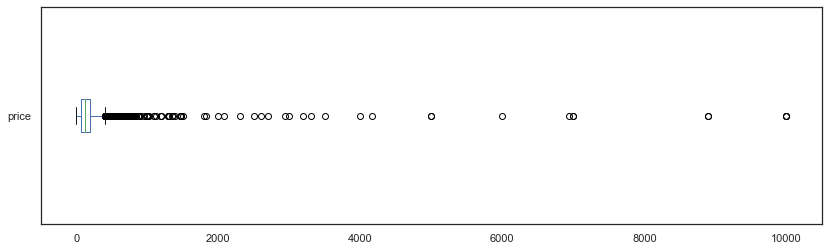


Below you can examine a boxplot based on the variable latitude.


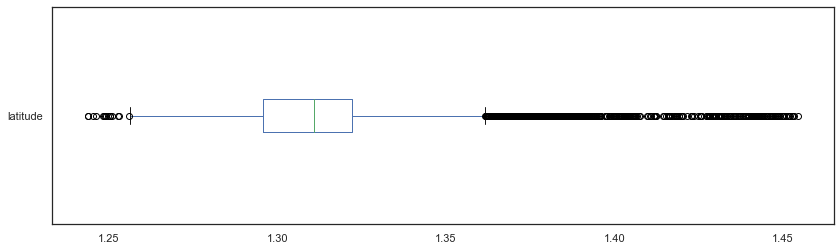

In [166]:
Boxplot()

In [167]:
## 3.2.5 plotting boxplot to further 
# price should equal chosen variable
def Boxplot():
    for char in c:
        print("\nBelow you can examine a boxplot based on the variable " + str(char)+":")
        plt.figure(figsize=(14,4))
        data[char].plot.box(vert = False)
        plt.show()
    return


Lastly, you can see a correlation matrix based on the numeric variables.
Please inspect it for potential and interesting correlations in your data set!


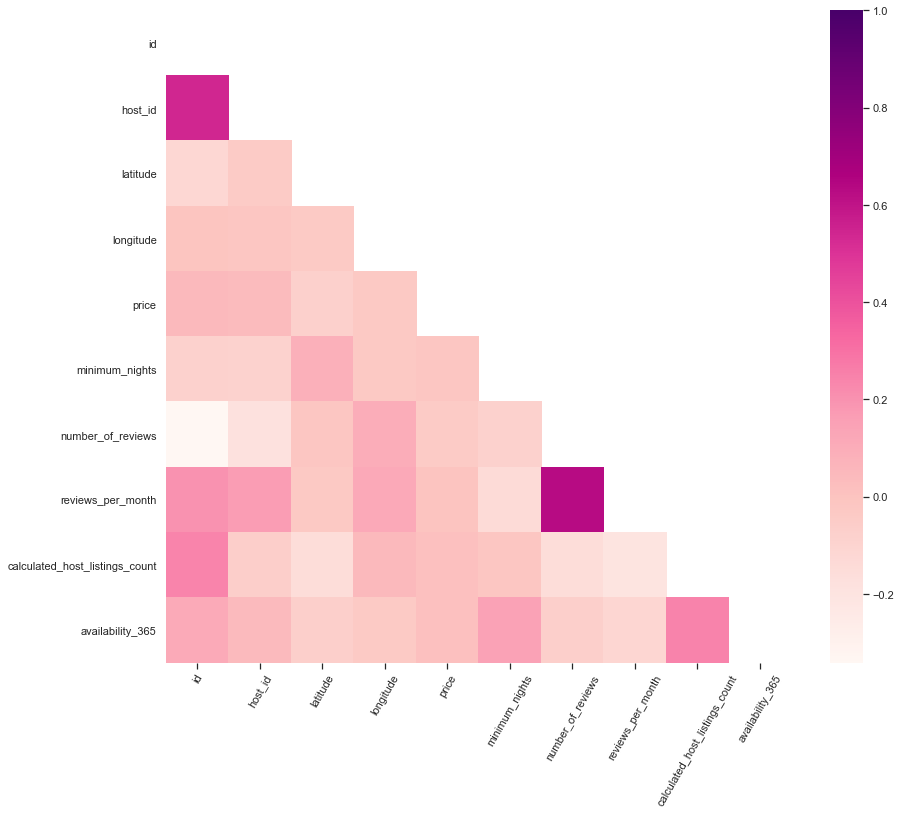

In [119]:
## 3.2.7 correlation Matrix of the numerical variables

print("\nLastly, you can see a correlation matrix based on the numeric variables." +
      "\nPlease inspect it for potential and interesting correlations in your data set!")

sn.set(style="white")
corr = data.corr()
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
cmap = sn.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sn.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           mask=mask,
           cmap="RdPu")
ax.xaxis.tick_bottom()
plt.setp(ax.get_xticklabels(), rotation=60)
plt.show()

In [ ]:
print("You have finished the data analyis!")